# Customer Segmentation for Retail Banking Stock Trading Services

A retail banking institution is going to float a stock trading facility for their existing customer. Since this kind of facitlity is nothing new , company knows that they will have to incetivise their customers for adopting their offerings.

One issue with that is that only about 10% of the customers do enought trades for earnings after discounts to be profitable. Company wants to figure out, which are those 10% customer so that it can selectively offer them discount. there is no magic way to figure that out. So company rolled out this service to about 10000+ of their customers and observed their trading behaviour for 6 months and after that they labelled them into two revenue.grids 1 and 2. using this data, now they want us to build a classification model which can be used to classify their remaining customers into these revenue grids.

## Import required libraries

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Read dataset

In [2]:
df=pd.read_csv("Existing Base.csv")

## Data exploration

In [3]:
# First 5 rows
df.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [4]:
# shape of dataset
df.shape

(10155, 32)

In [5]:
# some statistics of dataset
df.describe()

,REF_NO,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,5770.830822,1968.376366,23.441757,46.417760,27.579851,66.242131,19.142050,32.084965,26.006003,42.339698,6.112071,4.482002,19.162772,1.893058,36.564886,21.698694,31.988647,90.460237
std,3324.837813,180.202242,50.872127,78.477609,53.952550,95.545316,32.451856,45.486614,84.275743,63.898899,12.833675,9.982641,89.666263,0.309055,42.270530,31.893841,39.106347,107.265475
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-78.430000
25%,2903.500000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.230000,4.670000,8.740000,26.605000
50%,5770.000000,1988.000000,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,2.000000,23.980000,12.980000,21.340000,66.200000
75%,8665.500000,1994.000000,23.980000,65.385000,34.990000,94.390000,27.470000,46.480000,21.480000,59.555000,5.975000,4.490000,7.980000,2.000000,50.790000,28.300000,42.980000,125.935000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,156.870000,162.350000,4306.420000,2.000000,1231.090000,1279.100000,1771.160000,4283.560000


In [6]:
# Count of null value in each column
df.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
r

In [7]:
# Data type of each column
df.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

we need to convert categorical column into numeric

## Data Cleaning

###  Children column:

In [8]:
df["children"].value_counts()

Zero    6208
1       1848
2       1607
3        473
4+        19
Name: children, dtype: int64

In [9]:
#replace 'zero' with'0' and '4+' with '4'
df.loc[df["children"]=="Zero","children"]="0"
df.loc[df["children"]=="4+","children"]="4"
df["children"]=pd.to_numeric(df["children"],errors="coerce")

###  Revenue grid column:

In [10]:
df["Revenue Grid"].value_counts()

2    9069
1    1086
Name: Revenue Grid, dtype: int64

we create new column "y" where we will change the values of 'revenue grid' column. we convert all '2' into '0' and all '1' remain same.

In [11]:
df["y"]=np.where(df["Revenue Grid"]==2,0,1)

In [12]:
# drop original revenue grid column
df=df.drop(["Revenue Grid"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\91417527.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["Revenue Grid"],1)


In [13]:
df["y"].value_counts()

0    9069
1    1086
Name: y, dtype: int64

###  age_band column:

In [14]:
df["age_band"].value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

In age_band column,their are 13 unique variable.so we can not deal with them.so we compare them with "y" column which is target column and we can club those categories for which average is similar.

In [15]:
round(df.groupby("age_band")["y"].mean(),2)

age_band
18-21      0.17
22-25      0.11
26-30      0.11
31-35      0.11
36-40      0.13
41-45      0.11
45-50      0.10
51-55      0.10
55-60      0.11
61-65      0.09
65-70      0.10
71+        0.10
Unknown    0.05
Name: y, dtype: float64

In [16]:
for i in range(len(df)):
    if df["age_band"][i] in ["71+","65-70","51-55","45-50"]:
        df.loc[i,"age_band"]="ab_10"
    if df["age_band"][i] in ["55-60","41-45","31-35","22-25","26-30"]:
        df.loc[i,"age_band"]="ab_11"
    if df["age_band"][i]=="36-40":
        df.loc[i,"age_band"]="ab_13"
    if df["age_band"][i]=="18-21":
        df.loc[i,"age_band"]="ab_17"
    if df["age_band"][i]=="61-65":
        df.loc[i,"age_band"]="ab_9"
ab_dummies=pd.get_dummies(df["age_band"])
ab_dummies.head()

,Unknown,ab_10,ab_11,ab_13,ab_17,ab_9
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


we will add it back to dataset and drop the original age_band column and dummy for 'unknown'

In [17]:
df=pd.concat([df,ab_dummies],1)
df=df.drop(["age_band","Unknown"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\2272400917.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,ab_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_20556\2272400917.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["age_band","Unknown"],1)


### Status column:

In [18]:
df["status"].value_counts()

Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

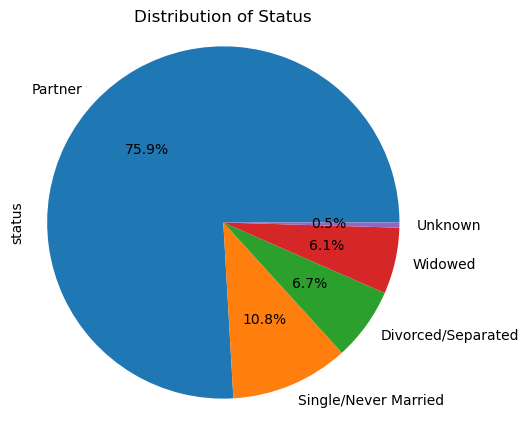

In [19]:
# Pie chart of status column
plt.figure(figsize=(5,5))
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Status')
plt.show()

we will create dummy variables for status column and drop the original 'status' column

In [20]:
df["st_partner"]=np.where(df["status"]=="Partner",1,0)
df["st_singleNm"]=np.where(df["status"]=="Single/Never Married",1,0)
df["st_divSep"]=np.where(df["status"]=="Divorced/Separated",1,0)
df=df.drop(["status"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\4215414425.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["status"],1)


### Occupation column:

In [21]:
df["occupation"].value_counts()

Professional         2449
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64

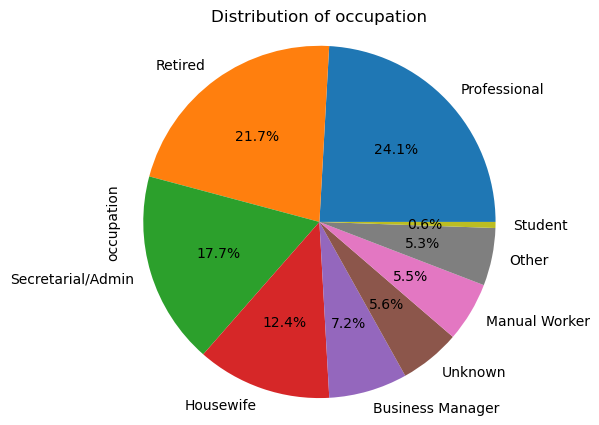

In [22]:
# Pie chart of occupatin column
plt.figure(figsize=(5,5))
df['occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of occupation')
plt.show()

 we compare occupation column with "y" column which is target column and we can club those categories for which average is similar.

In [23]:
round(df.groupby("occupation")["y"].mean(),2)

occupation
Business Manager     0.12
Housewife            0.09
Manual Worker        0.11
Other                0.11
Professional         0.12
Retired              0.10
Secretarial/Admin    0.11
Student              0.11
Unknown              0.11
Name: y, dtype: float64

In [24]:
for i in range(len(df)):
    if df["occupation"][i] in ["Unknown","Student","Secretarial/Admin","Other","Manual Worker"]:
        df.loc[i,"occupation"]="oc_11"
    if df["occupation"][i] in ["Professional","Business Manager"]:
        df.loc[i,"occupation"]="oc_12"
    if df["occupation"][i]=="Retired":
        df.loc[i,"occupation"]="oc_10"
oc_dummies=pd.get_dummies(df["occupation"])
oc_dummies.head()

,Housewife,oc_10,oc_11,oc_12
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


we will add it with dataset and drop 'occupation' column

In [25]:
df=pd.concat([df,oc_dummies],1)

df=df.drop(["occupation"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\130840160.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,oc_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_20556\130840160.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["occupation"],1)


### Occupation Partner column:

In [26]:
df["occupation_partner"].value_counts()

Unknown              2394
Professional         2051
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64

For 'occupation partner' column, we follow same process which we done for 'occupation' column 

In [27]:
round(df.groupby("occupation_partner")["y"].mean(),2)

occupation_partner
Business Manager     0.11
Housewife            0.11
Manual Worker        0.11
Other                0.10
Professional         0.11
Retired              0.10
Secretarial/Admin    0.12
Student              0.12
Unknown              0.10
Name: y, dtype: float64

In [28]:
df["ocp_10"]=0
df["ocp_11"]=0
df["ocp_12"]=0
for i in range(len(df)):
    if df["occupation_partner"][i] in ["Unknown","Retired","Other"]:
        df.loc[i,"ocp_10"]=1
    if df["occupation_partner"][i] in ["Business Manager","Housewife","Manual Worker"]:
        df.loc[i,"ocp_11"]=1
    if df["occupation_partner"][i] in ["Student","Secretarial/Admin"]:
        df.loc[i,"ocp_12"]=1

In [29]:
df=df.drop(["occupation_partner"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\472307901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["occupation_partner"],1)


### TVarea column:

In [30]:
df["TVarea"].value_counts()

Central          1618
Carlton          1541
Meridian         1226
Yorkshire        1042
Granada          1039
HTV               845
Anglia            751
Tyne Tees         536
Scottish TV       520
TV South West     363
Grampian          227
Unknown           189
Ulster            159
Border             99
Name: TVarea, dtype: int64

we compare TVarea column with "y" column which is target column and we can club those categories for which average is similar.

In [31]:
round(df.groupby("TVarea")["y"].mean(),2)

TVarea
Anglia           0.11
Border           0.14
Carlton          0.11
Central          0.11
Grampian         0.10
Granada          0.12
HTV              0.10
Meridian         0.09
Scottish TV      0.11
TV South West    0.09
Tyne Tees        0.09
Ulster           0.12
Unknown          0.12
Yorkshire        0.12
Name: y, dtype: float64

In [32]:
for i in range(len(df)):
    if df["TVarea"][i] in ["Anglia","Carlton","Central","Scottish TV"]:
        df.loc[i,"TVarea"]="tv_11"
    if df["TVarea"][i] in ["Granada","Ulster","Unknown","Yorkshire","Border"]:
        df.loc[i,"TVarea"]="tv_12"
    if df["TVarea"][i] in ["Grampian","HTV","Meridian","TV South West","Tyne Tees"]:
        df.loc[i,"TVarea"]="tv_10"
tv_dummies=pd.get_dummies(df["TVarea"])
tv_dummies.head()

,tv_10,tv_11,tv_12
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0


we add this dummy variable with dataset and drop the 'TVarea' column.

In [33]:
df=pd.concat([df,tv_dummies],1)

#delete TVarea column
df=df.drop(["TVarea"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\3449650288.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,tv_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_20556\3449650288.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["TVarea"],1)


### Post code column and Post area column:

In [34]:
df["post_code"].value_counts()

SA15 3HP    2
TQ12 6YA    2
NN11 5QA    2
PO36 9HR    2
LU7 7UQ     2
           ..
NR33 8TX    1
NG4 2DJ     1
WA7 1JJ     1
BB12 7HS    1
SA70 7LW    1
Name: post_code, Length: 10040, dtype: int64

In [35]:
df["post_area"].value_counts()

PR5     35
PR4     33
TQ12    28
WA7     28
WA4     26
        ..
SO23     1
SY12     1
DA2      1
RG45     1
PH13     1
Name: post_area, Length: 2039, dtype: int64

In post_code and post_area column,we can see that there are many unique values.so we can not deal with them.so we delete both column.

In [36]:
df=df.drop(["post_code","post_area"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\833517110.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["post_code","post_area"],1)


### Home status column:

In [37]:
df["home_status"].value_counts()

Own Home                9413
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64

we will create dummy variable for own home.

In [38]:
df["hs_own"]=np.where(df["home_status"]=="Own Home",1,0)

In [39]:
#delete 'home status' column
del df["home_status"]

### Gender column:

In [40]:
df["gender"].value_counts()

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64

In gender column count of female is more.so we create new column 'gender_f' ,in these column where female is present,it shows as 1 otherwise it shows 0.

In [41]:
df["gender_f"]=np.where(df["gender"]=="Female",1,0)

In [42]:
# delete gender column
del df["gender"]

### Self_employed column:

In [43]:
df["self_employed"].value_counts()

No     9436
Yes     719
Name: self_employed, dtype: int64

we create new column 'semp_yes',in these column where 'yes' is present it will show 1 and where 'no' is present it show 0.

In [44]:
df["semp_yes"]=np.where(df["self_employed"]=="Yes",1,0)

In [45]:
#delete 'self employed 'column
del df["self_employed"]

### Self employed partner column:

In [46]:
df["self_employed_partner"].value_counts()

No     9026
Yes    1129
Name: self_employed_partner, dtype: int64

we will repeate same process in 'self_employed_partner' column which we did in 'self_employed' column.

In [47]:
df["semp_part_yes"]=np.where(df["self_employed_partner"]=="Yes",1,0)

In [48]:
#delete 'self_employed_partner' column
del df["self_employed_partner"]

### Family income column:

In [49]:
df["family_income"].value_counts()

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

We can convert this to number by taking average of the range.

In [50]:
df["fi"]=4
df.loc[df["family_income"]=="< 8,000, >= 4,000","fi"]=6
df.loc[df["family_income"]=="<10,000, >= 8,000","fi"]=9
df.loc[df["family_income"]=="<12,500, >=10,000","fi"]=11.25
df.loc[df["family_income"]=="<15,000, >=12,500","fi"]=13.75
df.loc[df["family_income"]=="<17,500, >=15,000","fi"]=16.25
df.loc[df["family_income"]=="<20,000, >=17,500","fi"]=18.75
df.loc[df["family_income"]=="<22,500, >=20,000","fi"]=21.25
df.loc[df["family_income"]=="<25,000, >=22,500","fi"]=23.75
df.loc[df["family_income"]=="<27,500, >=25,000","fi"]=26.25
df.loc[df["family_income"]=="<30,000, >=27,500","fi"]=28.75
df.loc[df["family_income"]==">=35,000","fi"]=35

In [51]:
#delete 'family income' column
df=df.drop(["family_income"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\2268264679.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["family_income"],1)


### Region column:

In [52]:
df["region"].value_counts()

South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                571
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: region, dtype: int64

we will compare 'region' column with 'y' column and we can club those categories for which average is similar

In [53]:
round(df.groupby("region")["y"].mean(),2)

region
Channel Islands     0.20
East Anglia         0.13
East Midlands       0.10
Isle of Man         0.00
North               0.10
North West          0.11
Northern Ireland    0.12
Scotland            0.11
South East          0.10
South West          0.09
Unknown             0.12
Wales               0.11
West Midlands       0.11
Name: y, dtype: float64

In [54]:
for i in range(len(df)):
    if df["region"][i] in ["East Midlands","North","South East","South West"]:
        df.loc[i,"region"]="re_10"
    if df["region"][i] in ["North West","Scotland","Wales","West Midlands"]:
        df.loc[i,"region"]="re_11"
    if df["region"][i] in ["East Anglia","Northern Ireland","Unknown"]:
        df.loc[i,"region"]="re_12"
re_dummies=pd.get_dummies(df["region"])
re_dummies.head()

,Channel Islands,Isle of Man,re_10,re_11,re_12
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


we will add it with dataset and delete unnecessary column

In [55]:
df=pd.concat([df,re_dummies],1)

#delete unnecessary column
df=df.drop(["region","Channel Islands","Isle of Man"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\861981040.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,re_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_20556\861981040.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["region","Channel Islands","Isle of Man"],1)


In [56]:
df.dtypes

REF_NO                               int64
children                             int64
year_last_moved                      int64
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Investment in Commudity            float64
Investment in Equity               float64
Investment in Derivative           float64
Portfolio Balance                  float64
y                                    int32
ab_10                                uint8
ab_11                                uint8
ab_13                                uint8
ab_17                                uint8
ab_9       

Now we can see that the entire data is of numeric type.

In [57]:
df.dropna(axis=0,inplace=True)

In [58]:
df.shape

(10155, 45)

In [59]:
#Drop unnecessary Columns:
df=df.drop(["REF_NO"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_20556\2765815353.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["REF_NO"],1)


## Train-Test split:

Now we will split our data in two random part.one is training data in which we build our model and second is test data in which we test our model performance

In [60]:
df_train, df_test = train_test_split(df, test_size = 0.2,random_state=2)

In [61]:
x_train=df_train.drop(["y"],1)
y_train=df_train["y"]
x_test=df_test.drop(["y"],1)
y_test=df_test["y"]

C:\Users\d\AppData\Local\Temp\ipykernel_20556\3183347257.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=df_train.drop(["y"],1)
C:\Users\d\AppData\Local\Temp\ipykernel_20556\3183347257.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=df_test.drop(["y"],1)


## Model building:

### Logistic Regression model:

In [62]:
logr=LogisticRegression(penalty="l2",class_weight="balanced",random_state=2)

In [63]:
logr.fit(x_train,y_train)

C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=2)

### Model Evalution:

In [64]:
# confusion matrix
y_pred = logr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1656  151]
 [  31  193]]


In [65]:
y_pred = logr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9103889709502708
Precision: 0.561046511627907
Recall: 0.8616071428571429


### K fold cross validation:

In [66]:
accuracies = cross_val_score(estimator = logr, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 90.68 %
Standard Deviation: 1.08 %


C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-Nearest Neighbor (KNN):

In [67]:
classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=7 )  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9522402757262433

In [68]:
for k in [2,3,4,5,6,7,8,9,10]:
    print("value of k is ", k)
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy=",accuracy)
    precision = precision_score(y_test, y_pred)
    print("precision=",precision)
    recall = recall_score(y_test, y_pred)
    print("recall=",recall)
    print("*****************************************")

value of k is  2
accuracy= 0.9458394879369768
precision= 0.9523809523809523
recall= 0.5357142857142857
*****************************************
value of k is  3
accuracy= 0.9512555391432792
precision= 0.8930817610062893
recall= 0.6339285714285714
*****************************************
value of k is  4
accuracy= 0.9517479074347612
precision= 0.9565217391304348
recall= 0.5892857142857143
*****************************************
value of k is  5
accuracy= 0.9537173806006893
precision= 0.9276315789473685
recall= 0.6294642857142857
*****************************************
value of k is  6
accuracy= 0.9532250123092073
precision= 0.9708029197080292
recall= 0.59375
*****************************************
value of k is  7
accuracy= 0.9537173806006893
precision= 0.9276315789473685
recall= 0.6294642857142857
*****************************************
value of k is  8
accuracy= 0.9502708025603152
precision= 0.9424460431654677
recall= 0.5848214285714286
**************************************

## Support vector machine algorithm:

In [69]:
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(x_train, y_train)

SVC(random_state=0)

### Model Evaluation

In [70]:
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1807    0]
 [ 171   53]]


In [71]:
accuracy=accuracy_score(y_test, y_pred)
print("accuracy=",accuracy)
precision = precision_score(y_test, y_pred)
print("precision=",precision)
recall = recall_score(y_test, y_pred)
print("recall=",recall)

accuracy= 0.9158050221565731
precision= 1.0
recall= 0.23660714285714285
